## 【例9.1】MLPRegressor模型的示例代码。

In [ ]:


import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 生成示例数据集
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1) * 2

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 将目标变量转换为一维数组
y_train = y_train.ravel()
y_test = y_test.ravel()

# 创建一个MLPRegressor实例
regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

# 训练模型
regressor.fit(X_train, y_train)

# 预测
y_pred = regressor.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# 可视化训练数据和预测结果
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.xlabel('X')
plt.ylabel('y')
plt.title('True vs. Predicted values')
plt.legend()
plt.show()


## 【例9.2】MLPClassifier模型的示例代码。

In [ ]:


import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 加载示例数据集
data = load_iris()
X = data.data
y = data.target

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建一个 MLPClassifier 实例
classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# 训练模型
classifier.fit(X_train, y_train)

# 预测
y_pred = classifier.predict(X_test)

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 计算精确率、召回率和 F1 值
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# 打印评价指标
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## 【例9.3】BernoulliRBM进行特征提取的示例代码。

(1797, 64)
Features shape: (1797, 16)


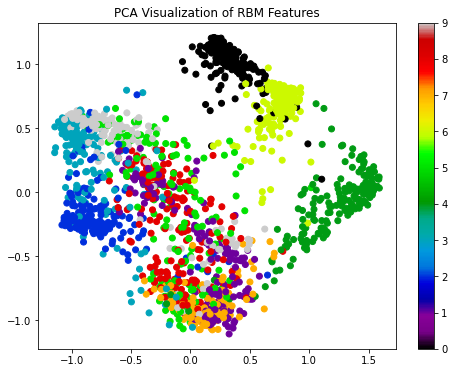

In [6]:

from sklearn.neural_network import BernoulliRBM
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA  # 新加入的PCA模块
import matplotlib.pyplot as plt

# 加载手写数字数据集
digits = load_digits()
X = digits.data
y = digits.target

# 数据预处理
X = MinMaxScaler().fit_transform(X)
print(X.shape)
# 定义BernoulliRBM模型，并设置参数
model = BernoulliRBM(n_components=16, learning_rate=0.01, n_iter=100)

# 训练模型
model.fit(X)

# 提取特征
X_features = model.transform(X)

# 输出特征矩阵的形状
print("Features shape:", X_features.shape)

# 使用PCA将特征可视化到2维空间
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_features)

# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.nipy_spectral)
plt.colorbar()
plt.title('PCA Visualization of RBM Features')
plt.savefig('RBM.png',dpi=300)

plt.show()


In [6]:
# 假设有一个用户观看历史的二进制矩阵，表示用户是否观看了某个视频类别
user_watch_history = [
    [1, 0, 1, 0, 0],  # 用户1的观看历史
    [0, 1, 1, 0, 1],  # 用户2的观看历史
     [1, 1, 0, 0,0],
     [1, 1, 0, 1, 1],
    # ... 更多用户的观看历史
]

# 使用 scikit-learn 中的 BernoulliRBM 进行训练
from sklearn.neural_network import BernoulliRBM

rbm = BernoulliRBM(n_components=64, learning_rate=0.01, n_iter=20, random_state=42)

# 将用户观看历史用于训练 RBM
rbm.fit(user_watch_history)

# 获取用户的潜在兴趣表示
user_interests = rbm.transform(user_watch_history)

print(user_interests.shape)
print(user_interests)

# 假设有一个新的用户，需要为其生成个性化的视频推荐
new_user = [0, 0, 1, 1, 0]  # 新用户的观看历史

# 使用训练好的 RBM 模型生成潜在兴趣表示
new_user_interests = rbm.transform([new_user])

# 基于新用户的潜在兴趣，生成视频推荐列表
# 可以根据生成的向量与其他用户的向量进行相似性比较，选择相似用户的观看历史来生成推荐列表
# 这里简单演示，仅根据潜在兴趣向量的平均值生成推荐
average_interests = user_interests.mean(axis=0)
recommended_videos = [video for video, interest in enumerate(average_interests) if interest > 0.5]

print("推荐给新用户的视频类别：", recommended_videos)


(4, 64)
[[0.4540824  0.45267089 0.45116414 0.45100804 0.4553104  0.45269582
  0.44994339 0.44391219 0.45306643 0.45230443 0.45050749 0.4528921
  0.44769498 0.45713697 0.45223115 0.45283302 0.45451444 0.45099766
  0.45003167 0.44852264 0.447279   0.45277781 0.44674829 0.44924831
  0.45680274 0.45544812 0.44517335 0.45445844 0.44810293 0.45015498
  0.45038198 0.45085196 0.45182723 0.4570143  0.44907345 0.45676735
  0.450398   0.45314903 0.45093861 0.45282541 0.45487714 0.45009998
  0.45504108 0.45276664 0.45889731 0.45152583 0.44969382 0.45346674
  0.45072784 0.4489152  0.45343005 0.44846945 0.44158819 0.44500657
  0.45780411 0.45114318 0.45545145 0.4481299  0.44945112 0.45036768
  0.45117451 0.45025461 0.45270851 0.45071791]
 [0.44149173 0.44799057 0.43648918 0.436001   0.43940278 0.43845243
  0.4475357  0.43749264 0.437613   0.43814164 0.44088116 0.44052916
  0.43999853 0.44159061 0.43822059 0.43572486 0.44346566 0.44528141
  0.44077425 0.44179898 0.43888399 0.44577477 0.44044184 0.439

In [7]:
# 假设有一个用户观看历史的二进制矩阵，表示用户是否观看了某个视频类别
user_watch_history = [
    [1, 0, 1, 0, 0],  # 用户1的观看历史
    [0, 1, 0, 1, 1],  # 用户2的观看历史
    [1, 1, 1, 0, 1],  # 用户3的观看历史
]

# 使用 scikit-learn 中的 BernoulliRBM 进行训练
from sklearn.neural_network import BernoulliRBM

rbm = BernoulliRBM(n_components=64, learning_rate=0.01, n_iter=20, random_state=42)

# 将用户观看历史用于训练 RBM
rbm.fit(user_watch_history)

# 获取用户的潜在兴趣表示
user_interests = rbm.transform(user_watch_history)

# 假设有一个新的用户，需要为其生成个性化的视频推荐
new_user = [0, 0, 1, 1, 0]  # 新用户的观看历史

# 使用训练好的 RBM 模型生成潜在兴趣表示
new_user_interests = rbm.transform([new_user])

# 基于新用户的潜在兴趣，生成视频推荐列表
# 这里简单演示，仅根据潜在兴趣向量的平均值生成推荐
average_interests = user_interests.mean(axis=0)
recommended_videos = [video for video, interest in enumerate(average_interests) if interest > 0.5]

print("推荐给新用户的视频类别：", recommended_videos)


推荐给新用户的视频类别： []


In [16]:
import numpy as np

# 假设有一个用户观看历史的二进制矩阵，表示用户是否观看了某个视频类别
user_watch_history = [
    [1, 1, 1, 0, 0],  # 用户1的观看历史
    [0, 1, 0, 0, 0],  # 用户2的观看历史
    [1, 1, 1, 1, 0],  # 用户3的观看历史
]

# 使用 scikit-learn 中的 BernoulliRBM 进行训练
from sklearn.neural_network import BernoulliRBM

rbm = BernoulliRBM(n_components=64, learning_rate=0.01, n_iter=20, random_state=42)

# 将用户观看历史用于训练 RBM
rbm.fit(user_watch_history)

# 获取用户的潜在兴趣表示
user_interests = rbm.transform(user_watch_history)

# 假设有一个新的用户，需要为其生成个性化的视频推荐
new_user = [0, 1,0 ,0, 0]  # 新用户的观看历史

# 使用训练好的 RBM 模型生成潜在兴趣表示
new_user_interests = rbm.transform([new_user])

# 计算新用户与其他用户的相似性
similarities = np.dot(user_interests, new_user_interests.T)

# 基于相似性生成视频推荐列表
recommended_videos = np.sum(similarities * np.array(user_watch_history), axis=0)
recommended_videos = [video for video, score in enumerate(recommended_videos) if score > 1]

print("推荐给新用户的视频类别：", recommended_videos)


推荐给新用户的视频类别： [0, 1, 2, 3]
